In [1]:
## Relevant modules.
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

In [2]:
## Reading file.
file = 'data/data_panel_final.csv'
panel = pd.read_csv(file, header=0)
print(panel.head(), '\n')
print(panel.info())

   doc_code  spec_code                       spec_es  \
0  16449291         22  anestesiologia y reanimacion   
1  31865019         22  anestesiologia y reanimacion   
2   8682278         22  anestesiologia y reanimacion   
3  19188542        120                   cardiologia   
4  70115939        120                   cardiologia   

                            spec_en  year  n_visits  n_surgeries  n_patients  \
0  anesthesiology and resuscitation  2008        59            1          67   
1  anesthesiology and resuscitation  2008        85            2          89   
2  anesthesiology and resuscitation  2008         6            4           6   
3                        cardiology  2008        24            3          24   
4                        cardiology  2008       429          104         430   

   c_visit  c_surgery  
0    21.69     205.85  
1    21.69     205.85  
2    21.69     205.85  
3    29.51     209.02  
4    29.51     209.02   

<class 'pandas.core.frame.DataFrame'

In [3]:
## Creating subpanel_01 based on specialty
group_01 = panel.groupby(['spec_code','spec_en','year'])[['doc_code']].count()
group_02 = panel.groupby(['spec_code','spec_en','year'])[['n_visits','n_surgeries','n_patients',\
                                                             'c_visit','c_surgery']].mean()

subpanel_01 = pd.merge(group_01, group_02, on=['spec_code','spec_en','year'])
subpanel_01.columns = ['doc_count','mean_n_visits','mean_n_surgeries','mean_n_patients',\
                       'mean_c_visit','mean_c_surgery']
subpanel_01.reset_index(inplace=True)
print(subpanel_01.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
spec_code           297 non-null int64
spec_en             297 non-null object
year                297 non-null int64
doc_count           297 non-null int64
mean_n_visits       297 non-null float64
mean_n_surgeries    297 non-null float64
mean_n_patients     297 non-null float64
mean_c_visit        295 non-null float64
mean_c_surgery      296 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 21.0+ KB
None


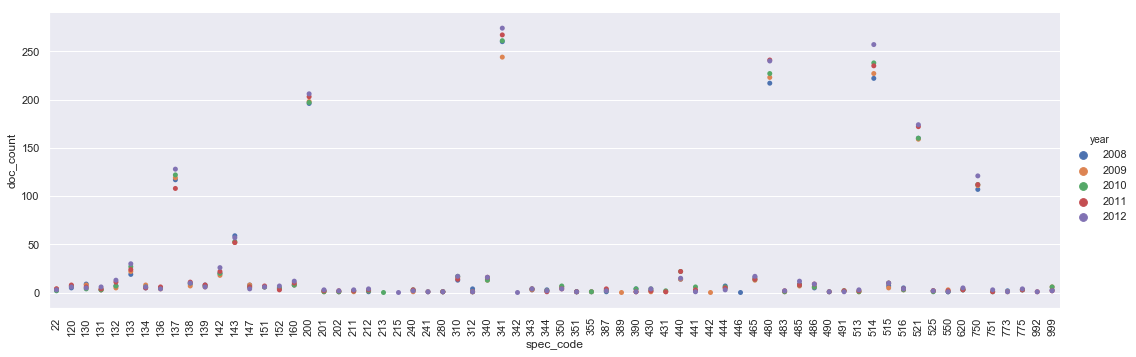

In [4]:
## Illustrating the number of doctors observed for each specialty.
sns.set(style='darkgrid')
fig_01 = sns.catplot(x='spec_code', y='doc_count', data=subpanel_01,\
                     jitter=False, hue='year', height=5, aspect=3)
fig_01.set_xticklabels(rotation=90)

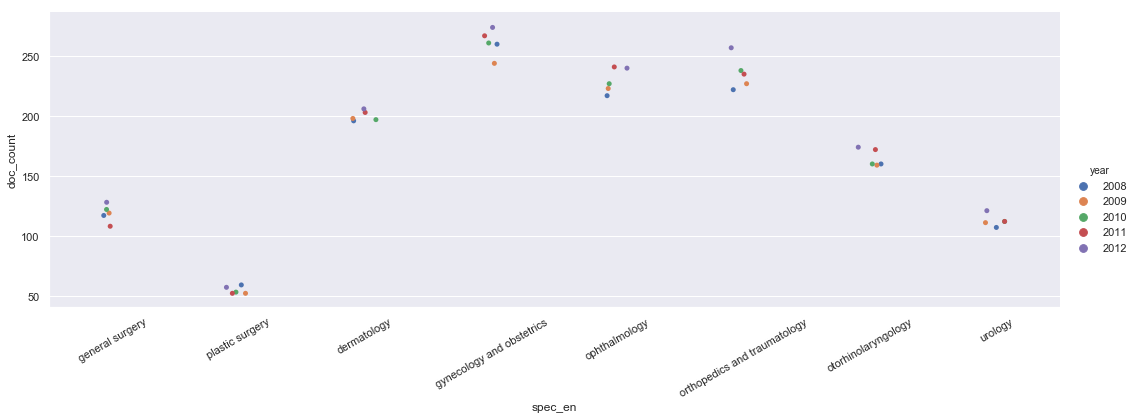

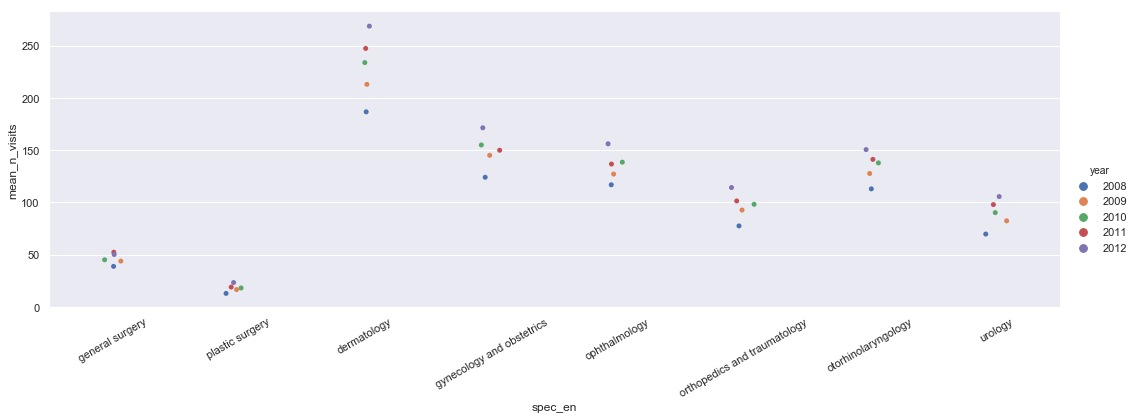

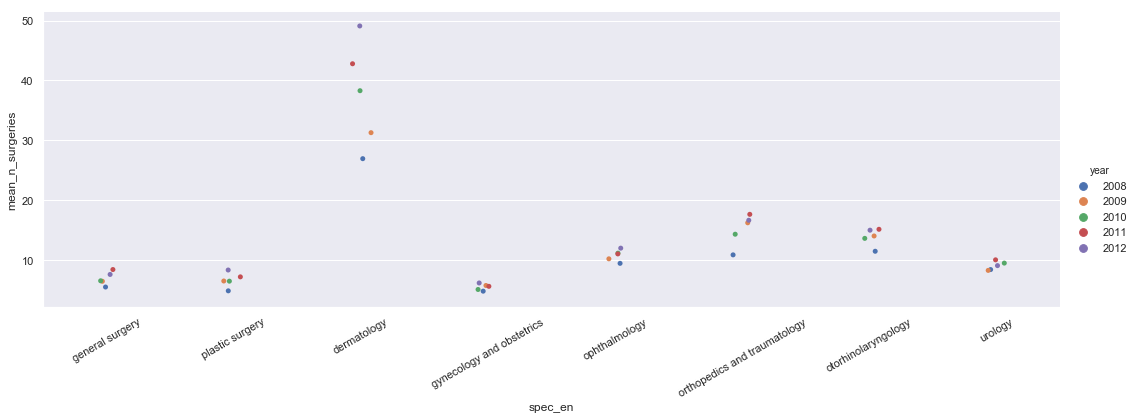

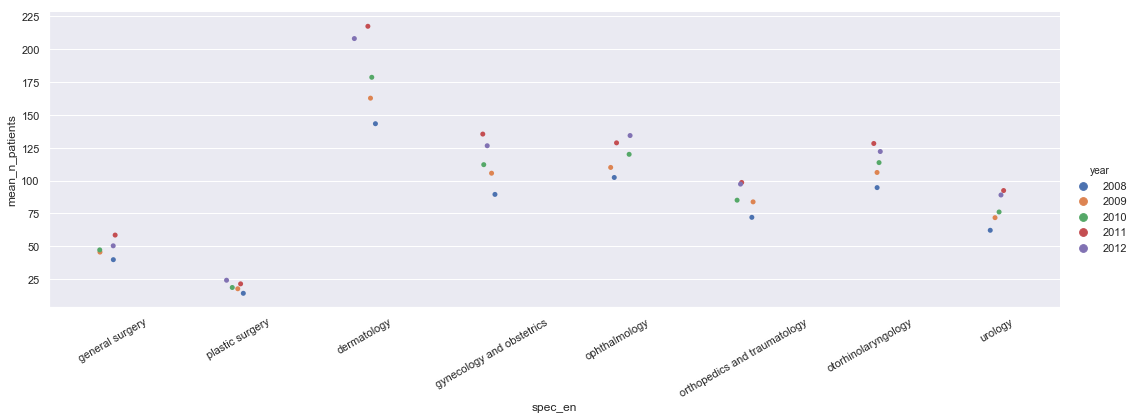

In [5]:
## Only specialties with more than 50 doctors observed per year.
doc_count_more_50 = subpanel_01['doc_count'] > 50

fig_A1 = sns.catplot(x='spec_en', y='doc_count', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_A1.set_xticklabels(rotation=30)

fig_A2 = sns.catplot(x='spec_en', y='mean_n_visits', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_A2.set_xticklabels(rotation=30)

fig_A3 = sns.catplot(x='spec_en', y='mean_n_surgeries', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_A3.set_xticklabels(rotation=30)

fig_A4 = sns.catplot(x='spec_en', y='mean_n_patients', data=subpanel_01[doc_count_more_50],\
                     jitter=True, hue='year', height=5, aspect=3)
fig_A4.set_xticklabels(rotation=30)


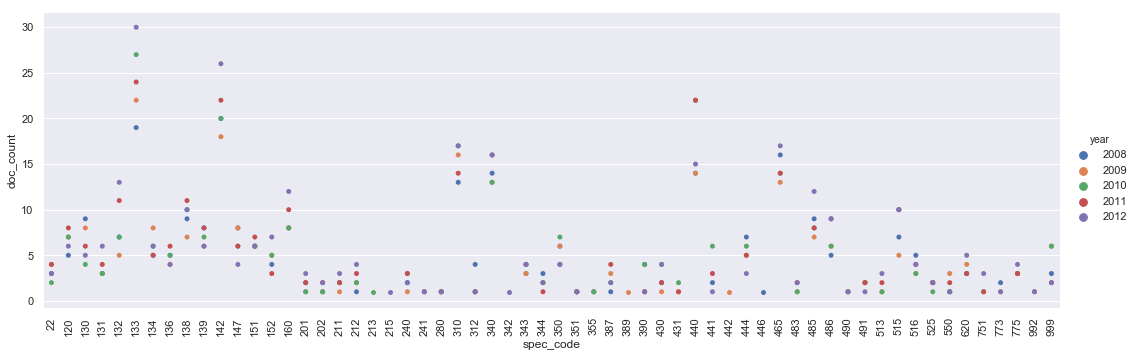

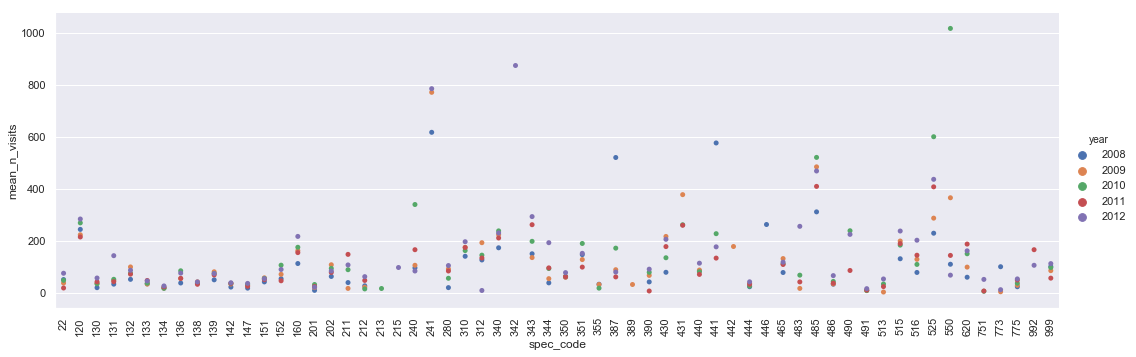

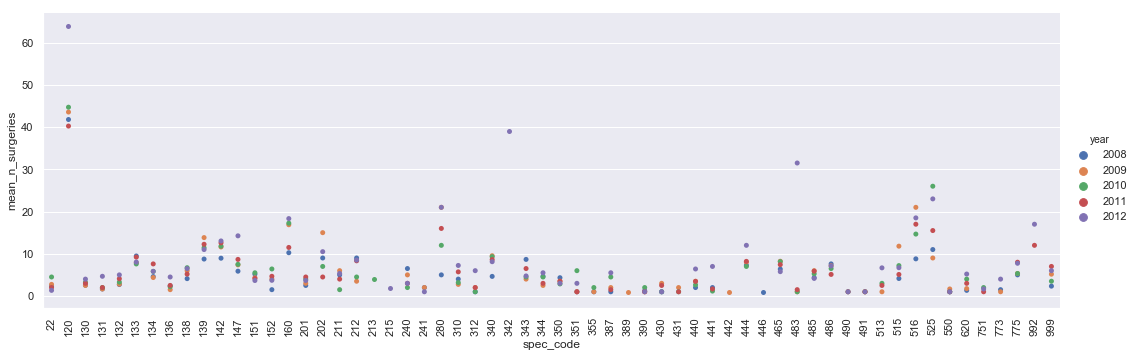

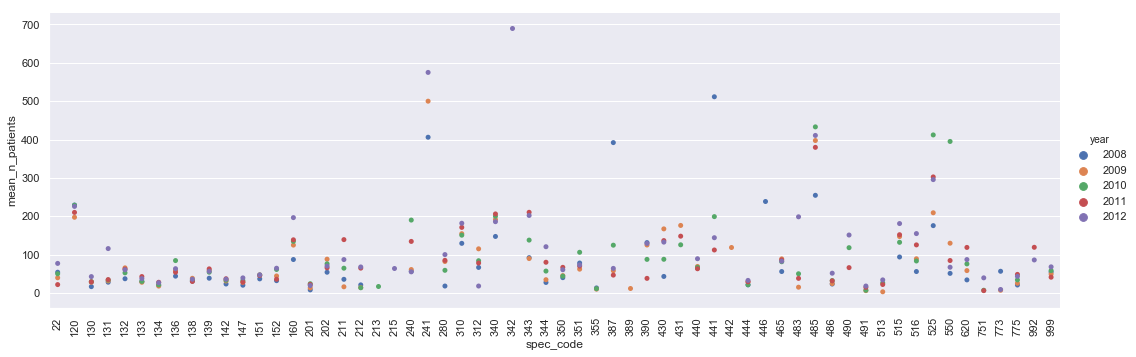

In [6]:
## Only specialties with less than 50 doctors observed per year.
doc_count_less_50 = subpanel_01['doc_count'] < 50

fig_B1 = sns.catplot(x='spec_code', y='doc_count', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_B1.set_xticklabels(rotation=90)

fig_B2 = sns.catplot(x='spec_code', y='mean_n_visits', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_B2.set_xticklabels(rotation=90)

fig_B3 = sns.catplot(x='spec_code', y='mean_n_surgeries', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_B3.set_xticklabels(rotation=90)

fig_B4 = sns.catplot(x='spec_code', y='mean_n_patients', data=subpanel_01[doc_count_less_50],\
                     jitter=False, hue='year', height=5, aspect=3)
fig_B4.set_xticklabels(rotation=90)